## Análise das 3 classes do dataset *Flor de Iris* com somente duas variáveis de entrada (Comprimento e Largura de Sépala)

In [1]:
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

X, y = load_wine(return_X_y = True)

entrada = X[:,:2]
saida = y[:]

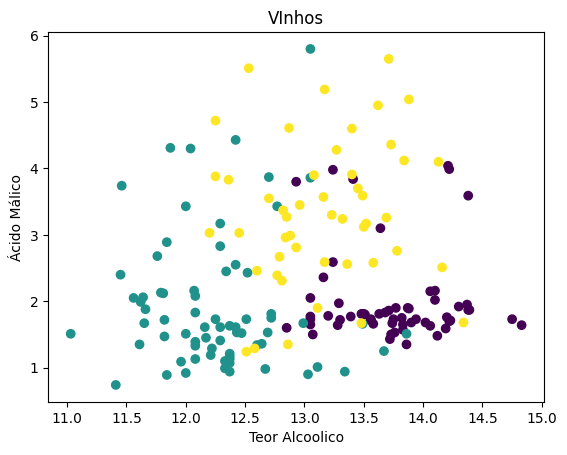

In [2]:
import matplotlib.pyplot as plt

plt.title("VInhos")
plt.xlabel("Teor Alcoolico")
plt.ylabel('Ácido Málico')
plt.scatter(entrada[:,0], entrada[:,1], c=saida)


In [3]:
sv = svm.SVC(kernel = 'linear', gamma='auto', C=5)
sv.fit(entrada, saida)
sv.score(entrada, saida)

'''
Justificativa:
Kernel linear:Útil quando as classes podem ser separadas linearmente. Menor custo computacional, mas pode ser ineficiente para dados não lineares.
gamma auto:Usa uma heurística com base no número de características, mas pode não ser o mais adequado.
c=5:Controla a regularização. Um valor mais alto de C faz o modelo tentar ajustar os dados de treino perfeitamente (risco de overfitting). Valores mais baixos de C promovem um modelo mais simples e com maior regularização.
'''

'\nJustificativa:\nKernel linear:Útil quando as classes podem ser separadas linearmente. Menor custo computacional, mas pode ser ineficiente para dados não lineares.\ngamma auto:Usa uma heurística com base no número de características, mas pode não ser o mais adequado.\nc=5:Controla a regularização. Um valor mais alto de C faz o modelo tentar ajustar os dados de treino perfeitamente (risco de overfitting). Valores mais baixos de C promovem um modelo mais simples e com maior regularização.\n'

**Equação geral da reta:**
ax + by + c = 0

by = -c - ax

y = (-c - ax) / b


**Equação reduzida da reta:**
mx + n = y

In [4]:
print(sv.coef_[0])
w1 = sv.coef_[0][0] # a
w2 = sv.coef_[0][1] # b
w0 = sv.intercept_[0] # c

[ 2.89380561 -0.03005927]


## Análise com Kernel polinomial

In [5]:
sv = svm.SVC(kernel = 'poly', degree=5, gamma='auto', C=3)
sv.fit(entrada, saida)
sv.score(entrada, saida)

0.8258426966292135

### Separação do dataset em Treino e Teste

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [7]:
sv = svm.SVC(kernel = 'poly', degree=5, gamma='auto', C=3)
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.9259259259259259

#### Relatório de Classificação

In [8]:
from sklearn.metrics import classification_report

previsao = sv.predict(X_test)
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.95      0.91      0.93        23
           2       0.92      0.86      0.89        14

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



In [9]:
# Acurácia geral do modelo
y_pred = sv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia geral do modelo: {accuracy * 100:.2f}%")

Acurácia geral do modelo: 92.59%
